# [データサイエンス入門:機械学習編](https://datawokagaku.com/ml/)

## 4 線形回帰/正規方程式

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

df = sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


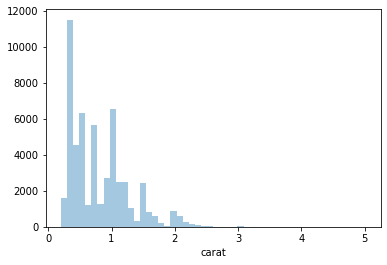

In [2]:
sns.distplot(df["carat"], kde=False)

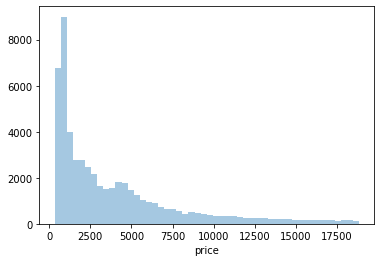

In [3]:
sns.distplot(df["price"], kde=False)

In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df = df[(df[["x", "y", "z"]] != 0).all(axis=1)]
len(df)

53920

Text(0, 0.5, 'price')

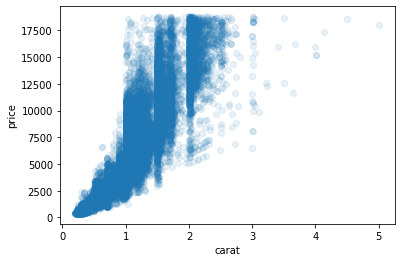

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

carat = df["carat"].values
price = df["price"].values

plt.scatter(carat, price, alpha=0.1)
plt.xlabel("carat")
plt.ylabel("price")

In [7]:
X = np.vstack([np.ones(len(carat)), carat]).T
X

array([[1.  , 0.23],
       [1.  , 0.21],
       [1.  , 0.23],
       ...,
       [1.  , 0.7 ],
       [1.  , 0.86],
       [1.  , 0.75]])

In [8]:
y = price
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta_best

array([-2255.76878704,  7755.76725406])

Text(0, 0.5, 'price')

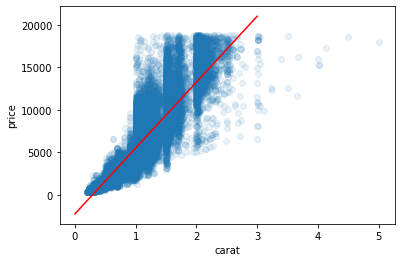

In [9]:
x_axis = np.linspace(0, 3, 10)
y_pred = theta_best[0] + theta_best[1]*x_axis

plt.scatter(carat, price, alpha=0.1)
plt.plot(x_axis, y_pred, "red")
plt.xlabel('carat')
plt.ylabel('price')

## 5 線形回帰/勾配法

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df[(df[['x','y','z']] != 0).all(axis=1)]
X = df['carat'].values
y = df['price'].values

In [12]:
print(X.shape, y.shape)

(53920,) (53920,)


In [13]:
X = X.reshape(-1, 1)
X.shape

(53920, 1)

In [14]:
model.fit(X, y)

LinearRegression()

求めた傾きと切片

In [15]:
print(model.coef_, model.intercept_)

[7755.76725406] -2255.768787037985


In [16]:
import numpy as np
X_new = np.array(2).reshape(-1, 1)
model.predict(X_new)

array([13255.76572108])

## 6 線形回帰の係数の解釈の仕方 

In [17]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = sns.load_dataset("diamonds")
df = df[(df[["x", "y", "z"]] != 0).all(axis=1)]
X = df["depth"].values
y = df["price"].values

model = LinearRegression()
X = X.reshape(-1, 1)
model.fit(X, y)
print(model.coef_, model.intercept_)

[-29.86685265] 5775.256869212753


In [18]:
X_ = np.append(np.ones((len(X), 1)), X, axis=1)
theta = np.append(model.intercept_, model.coef_)
y_preds = model.predict(X)

In [19]:
RSS = np.sum((y-y_preds)**2)
RSE = np.sqrt(RSS/(len(X_)-len(X_[0])))
SE_sq = RSE**2 * np.linalg.inv(np.dot(X_.T, X_)).diagonal()

In [20]:
t = theta/np.sqrt(SE_sq)
print(t)

[ 7.79972831 -2.4914259 ]


In [21]:
from scipy import stats
p = [2 * (1-stats.t.cdf(np.abs(t_val), (len(X_-len(X_[0]))))) for t_val in t]
p

[6.439293542825908e-15, 0.012726132194895934]

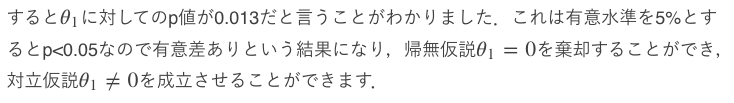

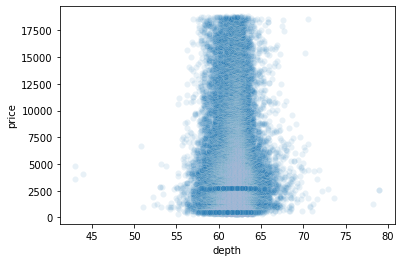

In [22]:
sns.scatterplot(x=df["depth"], y=df["price"], alpha=0.1)

散布図を見ると、線形関係にあるようには見えない。

p値で有意差が出た理由は、サンプル数が大きかったため、検定力が高くなり優位さが出やすくなってしまったから

p値は一発で求められる

In [23]:
import statsmodels.api as sma
X2 = sma.add_constant(X)
est = sma.OLS(y, X2)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.207
Date:                Thu, 06 Oct 2022   Prob (F-statistic):             0.0127
Time:                        22:31:48   Log-Likelihood:            -5.2355e+05
No. Observations:               53920   AIC:                         1.047e+06
Df Residuals:                   53918   BIC:                         1.047e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5775.2569    740.443      7.800      0.0

In [24]:
X = df[["carat", "depth", "table", "x", "y", "z"]].values
X2 = sma.add_constant(X)
est = sma.OLS(y, X2)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 5.505e+04
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:31:48   Log-Likelihood:            -4.7061e+05
No. Observations:               53920   AIC:                         9.412e+05
Df Residuals:                   53913   BIC:                         9.413e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.132e+04    456.639     46.682      0.0

## 7 過学習と汎化性能/hold-out法

In [25]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df[(df[['x','y','z']] != 0).all(axis=1)]
X = df['carat'].values.reshape(-1, 1)
y = df['price'].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 8 LOOCV

In [28]:
import seaborn as sns
import numpy as np

df = sns.load_dataset("tips")
X = df["total_bill"].values.reshape(-1, 1)
y = df["tip"].values

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [29]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
for train_index, test_index in loo.split(X):
    print("train index:", train_index, "test index:", test_index)

train index: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243] 

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
model = LinearRegression()
mse_list = []

for train_index, test_index in loo.split(X):
    #get train_data, test_data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #fit model
    model.fit(X_train, y_train)
    #predict test_data
    y_pred = model.predict(X_test)
    #loss
    mse = np.mean((y_pred-y_test)**2)
    mse_list.append(mse)
print(f"MSE(LOOCV): {np.mean(mse_list)}")
print(f"std: {np.std(mse_list)}")

MSE(LOOCV): 1.0675673489857438
std: 2.0997944551776313


## 9 k-Fold Cross Validation

In [31]:
import numpy as np
import seaborn as sns
df = sns.load_dataset("tips")
X = df["total_bill"].values.reshape(-1, 1)
y = df["tip"].values

In [32]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

cv = KFold(n_splits=5, random_state=0, shuffle=True)
model = LinearRegression()
mse_list = []

for train_index, test_index in cv.split(X):
    # get train and test data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # fit model
    model.fit(X_train, y_train)
    # predict test data
    y_pred = model.predict(X_test)
    # loss
    mse = np.mean((y_pred - y_test)**2)
    mse_list.append(mse)

print(f"MSE(5FoldCV): {np.mean(mse_list)}")
print(f"std: {np.std(mse_list)}")

MSE(5FoldCV): 1.080211088394392
std: 0.1617010050703952


上のループを無くしたバージョンもある。こっちの方を使うことが多いらしい。

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1)

In [34]:
scores

array([-0.82130906, -1.07458421, -1.08801239, -1.33238677, -1.084763  ])

In [35]:
np.mean(scores)

-1.080211088394392

## 10 回帰モデルの評価指標

### MSE

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

model = LinearRegression()

#data prepare
df = sns.load_dataset("tips")
X = df["total_bill"].values.reshape(-1, 1)
y = df["tip"].values

#holdout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
#train
model.fit(X_train, y_train)
#test
y_pred = model.predict(X_test)
#evaluate
mean_squared_error(y_test, y_pred)

0.8711845537539947

### RMSE

In [37]:
mean_squared_error(y_test, y_pred, squared=False)

0.933372676777071

###MAE

In [38]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.6903119067790222

###R-Squared

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.49515102188632776

###adjusted R-Squared

In [40]:
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(X_test)-1) / (len(X_test)-len(X_test[0])-1) 
adj_r2

0.48813923052363783

In [41]:
import statsmodels.api as sma
X2 = sma.add_constant(X)
est = sma.OLS(y, X2)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 06 Oct 2022   Prob (F-statistic):           6.69e-34
Time:                        22:31:52   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

##11 多項式特徴量

In [42]:
import seaborn as sns
df = sns.load_dataset("mpg")
df.dropna(inplace=True)
X = df["horsepower"].values.reshape(-1, 1)
y = df["mpg"].values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


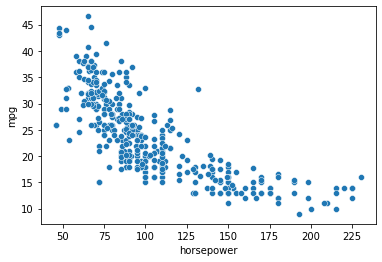

In [43]:
import matplotlib.pyplot as plt
sns.scatterplot(df['horsepower'], df['mpg'])

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
X_poly

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       ...,
       [1.0000e+00, 8.4000e+01, 7.0560e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]])

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly, y)
model.coef_

array([ 0.        , -0.46618963,  0.00123054])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


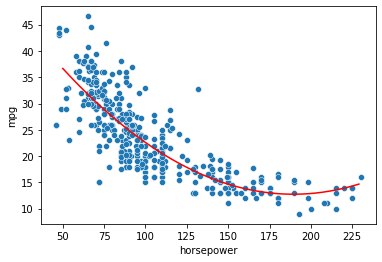

In [46]:
import numpy as np
x = np.arange(50, 230).reshape(-1, 1)
# .predictの前に同様にfit_transformする必要があることに注意
x_ = poly.fit_transform(x)
pred_ = model.predict(x_)

sns.scatterplot(df['horsepower'], df['mpg'])
plt.plot(x, pred_, 'r')

特徴量の変換など，学習時に前処理をした場合はテストデータに対しても同様に前処理をする必要

##12 Bias-Variance Tradeoff

Biasは複雑な問題を簡略化したことによるエラー．

Varianceは学習データを変えた時のモデルの分散．

* test errorもtrain errorも高い
    * Biasの問題なので次元を上げたり特徴量を増やす．
    * データを増やしてもtest errorは下がらない場合が多い
* test errorは高いがtrain errorは低い
    * Varianceの問題なので次元を下げたり特徴量を減らす．
    * またデータを増やすことで解決する場合もある

## 13 one-hot エンコーディング

In [47]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [48]:
df["cut"].drop_duplicates()

0        Ideal
1      Premium
2         Good
5    Very Good
8         Fair
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [49]:
import pandas as pd
pd.get_dummies(df[["cut"]])

,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
53935,1,0,0,0,0
53936,0,0,0,1,0
53937,0,0,1,0,0
53938,0,1,0,0,0


In [50]:
pd.get_dummies(df[["cut"]], drop_first=True)

,cut_Premium,cut_Very Good,cut_Good,cut_Fair
0,0,0,0,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
53935,0,0,0,0
53936,0,0,1,0
53937,0,1,0,0
53938,1,0,0,0


In [51]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,carat,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import seaborn as sns

model = LinearRegression()
X = df.loc[:, df.columns!="price"]
y = df["price"]

cv = KFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1)
print(np.abs(np.mean(scores)))

740.5483989635783


In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
 
model = LinearRegression()
 
df = sns.load_dataset('diamonds')
# include all fields
# df = pd.get_dummies(df, drop_first=True)
# X = df.loc[:, df.columns!='price']
# include only continuous field
X = df.loc[:, ~df.columns.isin(['price', 'cut', 'clarity', 'color'])]
y = df['price']
 
cv = KFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print(np.abs(np.mean(scores)))

890.1499487422172


##14 正則化項を用いて特徴量選択

In [54]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [55]:
df.dropna(inplace=True)

In [56]:
#ダミー変数
df = pd.get_dummies(df, drop_first=True)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


In [57]:
from sklearn.model_selection import train_test_split
#目的変数
target = "Salary"
X = df.loc[:, df.columns!=target]
y = df[target]
#hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Lassoを使う場合は事前にデータを標準化

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
#train
model = Lasso()
#test
model.fit(X_train, y_train)
#evaluation
y_pred = model.predict(X_test)
#mse
mse = mean_squared_error(y_test, y_pred)
mse

117704.40338817055

いくつかの係数が0になっていることがわかる

In [60]:
model.coef_

array([-263.93021843,  267.26811881,   42.953601  ,  -33.47452958,
          7.47725776,  125.12341811,  -29.67148909, -238.55413784,
        329.80466506,   -3.98547868,  259.40614775,    0.        ,
       -161.2607052 ,   71.00768965,   40.39356866,  -30.35965777,
         -0.        ,  -47.8140956 ,   13.94948672])

In [61]:
import numpy as np
mse_list = []
coefs = []
alphas = np.linspace(0.01, 300, 300)

for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    coefs.append(model.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.885e+05, tolerance: 3.232e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


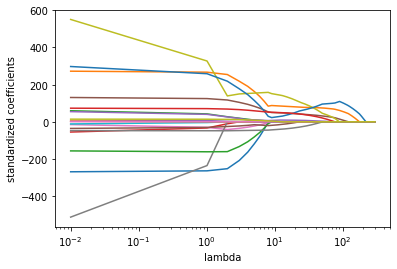

In [62]:
import matplotlib.pyplot as plt
plt.plot(alphas, coefs)
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("standardized coefficients")
plt.show()

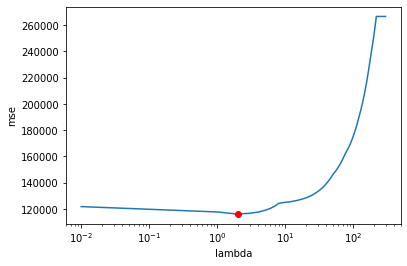

In [63]:
plt.plot(alphas, mse_list)
plt.plot(alphas[np.argmin(mse_list)], np.min(mse_list), "ro")
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("mse")
plt.show()

##15 kNN回帰

Text(0, 0.5, 'mpg')

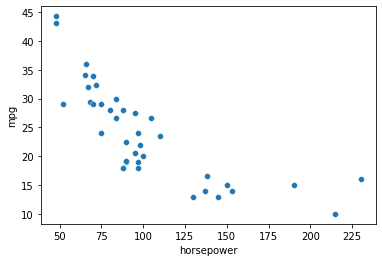

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = sns.load_dataset("mpg")
df.dropna(inplace=True)

X = df["horsepower"].values.reshape(-1, 1)
y = df["mpg"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)

sns.scatterplot(x=X_train[:, 0], y=y_train)
plt.xlabel('horsepower')
plt.ylabel('mpg')

In [65]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


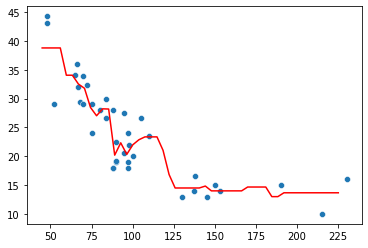

In [66]:
x_axis = np.linspace(45, 225).reshape(-1, 1)
y_pred = model.predict(x_axis)
sns.scatterplot(X_train[:, 0], y_train)
plt.plot(x_axis, y_pred, "red")

kを大きくするにつれ，varianceが小さくなり，biasが上がっていく


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


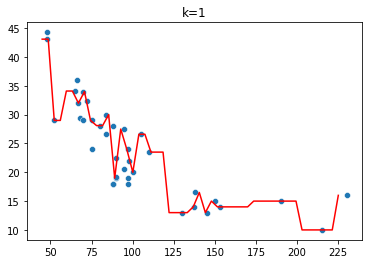

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


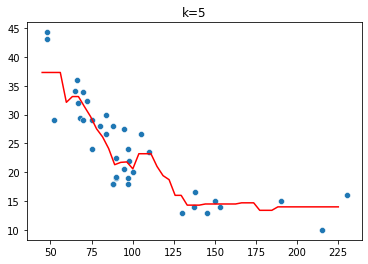

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


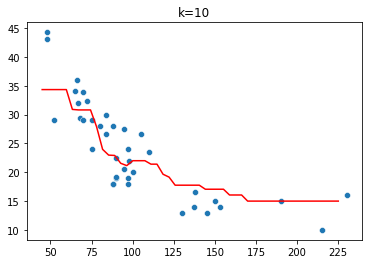

In [67]:
k_list = np.array([1, 5, 10])
for k in k_list:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    x_axis = np.linspace(45, 225).reshape(-1, 1)
    y_pred = model.predict(x_axis)
    sns.scatterplot(X_train[:, 0], y_train)
    plt.plot(x_axis, y_pred, "red")
    plt.title(f"k={k}")
    plt.show()

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# データ準備
df = sns.load_dataset('mpg')
df.dropna(inplace=True)
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values

score_list = []
k_list = np.arange(1, 30)
for k in k_list:
    #model
    model = KNeighborsRegressor(n_neighbors=k)
    #5-kFold
    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1)
    # neg_mean_squared_errorは負の値なので反転させることに注意
    score_list.append(-np.mean(scores))

print(f'Best performanc: k={k_list[np.argmin(score_list)]}, cv error={np.min(score_list)}')

Best performanc: k=13, cv error=18.246332680352378


Text(0, 0.5, '5fold cv error')

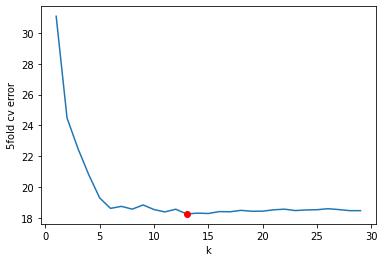

In [69]:
plt.plot(k_list, score_list)
plt.plot(k_list[np.argmin(score_list)], np.min(score_list), "ro")
plt.xlabel("k")
plt.ylabel("5fold cv error")

##16 分類タスクとロジスティック回帰

##17 ロジスティック回帰で多クラス分類

##18 Pythonでロジスティック回帰

In [70]:
import seaborn as sns
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


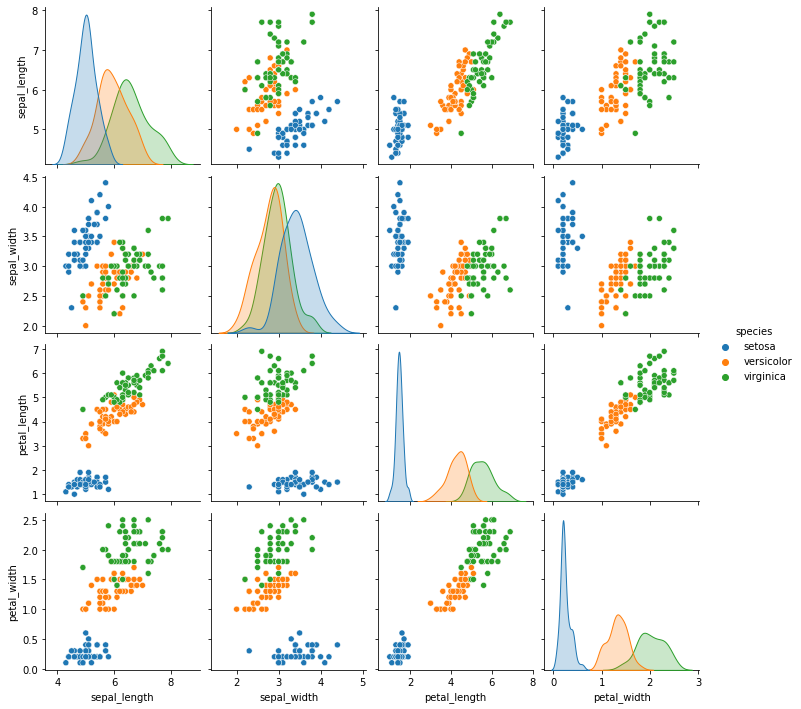

In [71]:
sns.pairplot(df, hue="species")

In [72]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns!="species"]
y = df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(len(X_train), len(X_test))

105 45


In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty="none")
model.fit(X_train, y_train)

LogisticRegression(penalty='none')

In [74]:
model.predict(X_test)

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [75]:
model.predict_proba(X_test)

array([[0.00000000e+000, 3.17563024e-259, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 2.66330600e-242],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 8.28134284e-194, 1.00000000e+000],
       [1.00000000e+000, 1.68095378e-284, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 6.49416883e-212],
       [0.00000000e+000, 1.00000000e+000, 1.86863624e-178],
       [0.00000000e+000, 1.00000000e+000, 7.06829390e-289],
       [0.00000000e+000, 1.29697458e-181, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 7.76230538e-228],
       [0.00000000e+000, 1.00000000e+000, 5.02742667e-123],
       [0.00000000e+000, 1.00000000e+000, 2.03311498e-161],
       [0.00000000e+000, 1.00000000e+000, 6.45617591e-100],
       [1.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000

In [76]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [77]:
model.intercept_

array([  80.23761264,  129.79119877, -210.02881141])

In [78]:
model.coef_

array([[ 155.59729898,  358.73830933, -523.93809358, -248.11591057],
       [ 118.20298002,  -15.08081952,  -41.54669686,  -91.11017744],
       [-273.800279  , -343.65748981,  565.48479044,  339.22608801]])

In [79]:
model.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

3クラス分類を行う場合、3つのロジスティック回帰の式を学習し、その3つの式の中で一番大きな値の式を持つクラスに割り当てる

##19 混同行列

In [80]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

df = sns.load_dataset("iris")
X = df.loc[:, df.columns!="species"]
y = df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LogisticRegression(penalty="none")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 10]])

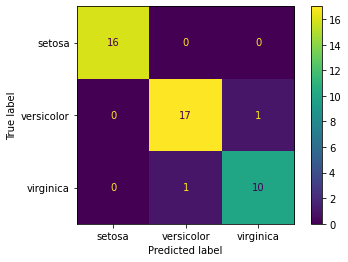

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

##20 分類器の評価指標

### Accuracy (正解率)
正解の数/全データ

In [82]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
 
# データロード
df = sns.load_dataset('iris')
# 学習データとテストデータ作成
X = df.loc[:, df.columns!='species']
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル構築
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)
# 予測(ラベル)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9555555555555556

###Precision (適合率)
“陽性”と分類した中で実際に”陽性”だった割合

多クラスの場合は基本的にはmacro平均をとる

In [83]:
from sklearn.metrics import precision_score
# None
print(precision_score(y_test, y_pred, average=None))
# macro
print(precision_score(y_test, y_pred, average='macro'))
# micro
print(precision_score(y_test, y_pred, average='micro'))

[1.         0.94444444 0.90909091]
0.9511784511784511
0.9555555555555556


###Recall (再現率)
Positiveのデータをどれだけ正しくPositiveと言えたか

In [84]:
from sklearn.metrics import recall_score
# None
print(recall_score(y_test, y_pred, average=None))
# macro
print(recall_score(y_test, y_pred, average='macro'))
# micro
print(recall_score(y_test, y_pred, average='micro'))

[1.         0.94444444 0.90909091]
0.9511784511784511
0.9555555555555556


###Specificity (特異度)
“Negative”のデータを正しく”Negative”と分類できたデータの割合

In [85]:
import numpy as np
res = []
for c in model.classes_:
    res.append(recall_score(np.array(y_test)!=c, np.array(y_pred)!=c))
res

[1.0, 0.9629629629629629, 0.9705882352941176]

In [86]:
# macro
np.mean(res)

0.9778503994190269

##21 F値とPrecisionとRecallのトレードオフ
F値(F-score)は，RecallとPrecisionの調和平均

In [87]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="macro")

0.9511784511784511

In [88]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle_heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [89]:
# 異常値の削除
df = df[df["ca"]<4]
df = df[df["thal"]>0]

# カラム名をもっとわかりやすい名前に変換
df = df.rename(columns = {'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure', 'chol': 'cholesterol','fbs': 'fasting_blood_sugar', 
                       'restecg' : 'rest_electrocardiographic', 'thalach': 'max_heart_rate_achieved', 'exang': 'exercise_induced_angina',
                       'oldpeak': 'st_depression', 'slope': 'st_slope', 'ca':'num_major_vessels', 'thal': 'thalassemia'}, errors="raise")
 
# 質的変数の値がintegerになっているので，文字列にする(ついでにわかりやすい値を入れる
df["sex"][df["sex"]==0] = "female"
df["sex"][df["sex"]==1] = "male"

df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'
 
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'
 
df['rest_electrocardiographic'][df['rest_electrocardiographic'] == 0] = 'normal'
df['rest_electrocardiographic'][df['rest_electrocardiographic'] == 1] = 'ST-T wave abnormality'
df['rest_electrocardiographic'][df['rest_electrocardiographic'] == 2] = 'left ventricular hypertrophy'
 
df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'
 
df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'
 
df['thalassemia'][df['thalassemia'] == 1] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 2] = 'normal'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

#質的変数をダミー変数にする
df = pd.get_dummies(df, drop_first=True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/di

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_electrocardiographic_left ventricular hypertrophy,rest_electrocardiographic_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
0,52,125,212,168,1.0,2,0,1,0,0,1,1,0,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,0,0,1,0,0,1,1,0,1,0,1
2,70,145,174,125,2.6,0,0,1,0,0,1,1,0,0,1,0,1,0,1
3,61,148,203,161,0.0,1,0,1,0,0,1,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,3,0,0,0,0,1,0,0,0,0,1,0,1,0


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
 
# 学習データとテストデータ作成
X = df.loc[:, df.columns!='target']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル構築
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# 予測(確率)
y_pred_proba = model.predict_proba(X_test)

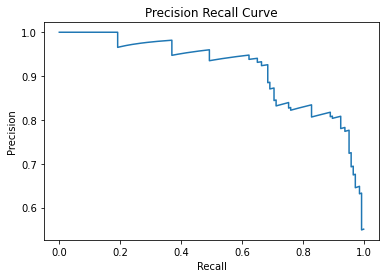

In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
%matplotlib inline

# 陽性の確率だけが必要なので[:, 1]をして陰性の確率を落とす
pos_prob = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, pos_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")
plt.show()

PrecisionとRecallをどちらもいい具合に高くなるような閾値を選択したい時は，F値が最も高くなる閾値を選ぶ

66th threshold(=0.44) is highest f1 score =0.86


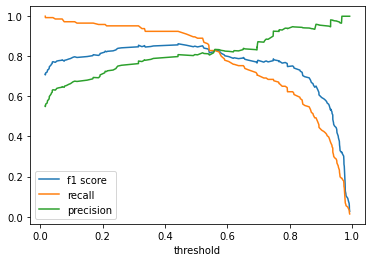

In [92]:
import numpy as np
from scipy.stats import hmean
#F値計算
f1_scores = []
for p, r in zip(precision, recall):
    f1 = hmean([p, r])
    f1_scores.append(f1)

# Precision, Recall, F値を描画(vs 閾値)
plt.plot(thresholds, f1_scores[:-1], label='f1 score')
plt.plot(thresholds, recall[:-1], label='recall')
plt.plot(thresholds, precision[:-1], label='precision')
plt.xlabel('threshold')
plt.legend()
print(f'{np.argmax(f1_scores)}th threshold(={thresholds[np.argmax(f1_scores)]:.2f}) is highest f1 score ={np.max(f1_scores):.2f}')

##22 ROCとAUC

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns!="target"]
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

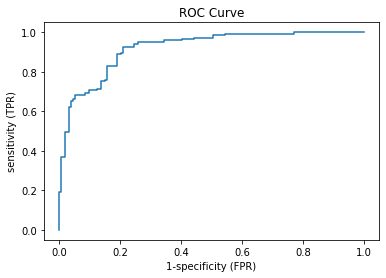

In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
%matplotlib inline

pos_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, tresholds = roc_curve(y_test, pos_prob)

plt.plot(fpr, tpr)
plt.xlabel('1-specificity (FPR)') 
plt.ylabel('sensitivity (TPR)')
plt.title('ROC Curve')
plt.show()

ROCカーブが作る面積AUCが大きいと精度が高いモデル

In [95]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9196762141967622

##23 多クラス分類におけるROCとAUC
多クラス分類のROCでは，クラスの数分ROCを描く

In [96]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
 
# データロード
df = sns.load_dataset('iris')
# 学習データとテストデータ作成
X = df.loc[:, df.columns!='species']
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル構築
model = LogisticRegression()
model.fit(X_train, y_train)
# 予測(確率)
y_pred_proba = model.predict_proba(X_test)

In [97]:
y_test[:5]

114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
Name: species, dtype: object

In [98]:
from sklearn.preprocessing import label_binarize
y_test_one_hot = label_binarize(y_test, classes=model.classes_)
y_test_one_hot[:5]

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [99]:
from sklearn.metrics import roc_curve, auc
n_classes = 3
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

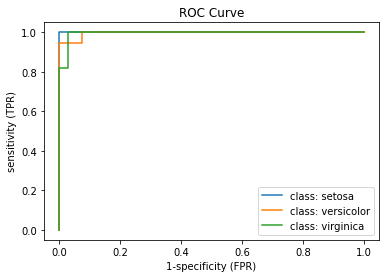

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"class: {model.classes_[i]}")
    
plt.xlabel('1-specificity (FPR)') 
plt.ylabel('sensitivity (TPR)')
plt.title('ROC Curve')
plt.legend()

###多クラスROCのmacro平均
 クラス毎にSensitivity(TPR)と1-Specificity(FPR)を計算し，クラス間で平均を取ってROCを描く

In [101]:
import numpy as np
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
all_fpr

array([0.        , 0.02941176, 0.07407407, 1.        ])

3クラスのカーブを平均する場合、補完して平均の座標点を求める

In [102]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr = mean_tpr / len(model.classes_)
mean_tpr

array([0.92087542, 0.98148148, 1.        , 1.        ])

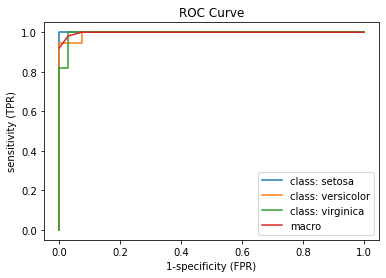

In [103]:
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"class: {model.classes_[i]}")
plt.plot(fpr["macro"], tpr["macro"], label="macro")

plt.xlabel('1-specificity (FPR)') 
plt.ylabel('sensitivity (TPR)')
plt.title('ROC Curve')
plt.legend()

In [104]:
roc_auc["macro"]

0.9981505321919265

###多クラスROCのmicro平均
データ全体でSensitivity(TPR)と1-Specificity(FPR)を計算し，ROCを描く

In [105]:
fpr['micro'], tpr['micro'], _ = roc_curve(y_test_one_hot.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

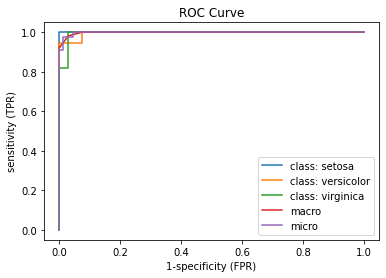

In [106]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"class: {model.classes_[i]}")
plt.plot(fpr["macro"], tpr["macro"], label="macro")
plt.plot(fpr['micro'], tpr['micro'], label='micro')

plt.xlabel('1-specificity (FPR)') 
plt.ylabel('sensitivity (TPR)')
plt.title('ROC Curve')
plt.legend()

データ数が小さいクラスも他のクラスと同じくらい結果に反映させたければmacro平均

データ数が多ければ多いだけ結果に反映させたければmicro平均

##24 PCA

In [107]:
import seaborn as sns
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [108]:
from sklearn.preprocessing import StandardScaler
X = df.loc[:, df.columns!="species"]
y = df["species"].values
#標準化
sc = StandardScaler()
X = sc.fit_transform(X)

In [109]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pc = pca.transform(X)

In [112]:
import pandas as pd
y = y.reshape(-1, 1)
df_pc = pd.DataFrame(np.concatenate([X_pc, y], axis=1), columns=['first component', 'second component', 'species']).astype({'first component':float, 'second component':float})

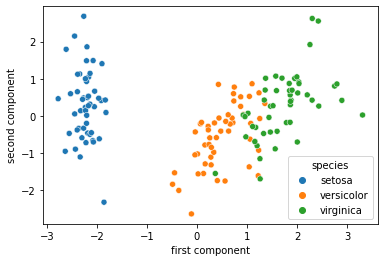

In [113]:
sns.scatterplot(x="first component", y="second component", hue="species", data=df_pc)

In [115]:
pca = PCA(n_components=4)
pca.fit(X)
#寄与率
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

累積寄与率

In [116]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

Text(0, 0.5, 'cumulative explained variance')

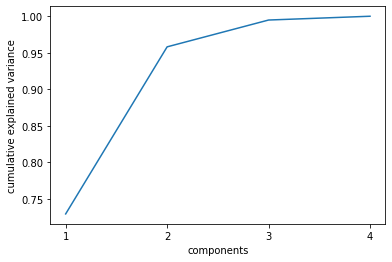

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

n_components = 4
plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1, n_components+1))
plt.xlabel('components')
plt.ylabel('cumulative explained variance')

##25 PCAを使ってモデル構築

In [119]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [120]:
mnist.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
mnist.data.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [122]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

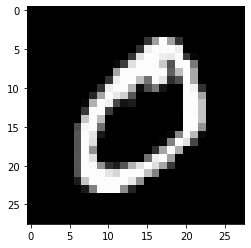

In [124]:
import matplotlib.pyplot as plt
idx = 1
im = mnist.data.loc[idx].values.reshape(28, 28)
plt.imshow(im, "gray")

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=0)

PCAを実行する前には標準化が必要

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train_pc = pca.transform(X_train)
X_test_pc = pca.transform(X_test)

print(f'{X_train.shape[-1]} dimention is reduced to {X_train_pc.shape[-1]} dimention by PCA')

784 dimention is reduced to 323 dimention by PCA


In [129]:
from sklearn.linear_model import LogisticRegression
import time
model_pca = LogisticRegression()
before = time.time()
model_pca.fit(X_train_pc, y_train)
after = time.time()
print(f'fit took {after-before:.2f}s')

fit took 37.83s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [130]:
model_pca.predict(X_test_pc[0].reshape(1, -1))

array(['0'], dtype=object)

In [131]:
y_test.iloc[0]

'0'

In [132]:
# PCAなしでロジスティック回帰
from sklearn.linear_model import LogisticRegression
import time
model = LogisticRegression()
before = time.time()
model.fit(X_train, y_train)
after = time.time()
print(f'fit took {after-before:.2f}s')

fit took 41.00s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [133]:
# ROC
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
 
 
def all_roc(model, X_test, y_test):
    #クラス数
    n_classes = len(model.classes_)
    #OvRのためのone-hotエンコーディング
    y_test_one_hot = label_binarize(y_test, classes=list(map(str, range(n_classes))))
    predict_proba = model.predict_proba(X_test)
    fpr = {}
    tpr = {}
    roc_auc = {}
    #クラスごとにROCとAUCを計算
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predict_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    #micro平均
    fpr['micro'], tpr['micro'], _ = roc_curve(y_test_one_hot.ravel(), predict_proba.ravel())
    roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])
    
    # macro平均
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr = mean_tpr / n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    return fpr, tpr, roc_auc

In [134]:
fpr, tpr, roc_auc = all_roc(model, X_test, y_test)
fpr_pca, tpr_pca, roc_auc_pca = all_roc(model_pca, X_test_pc, y_test)

In [135]:
import pandas as pd
result_df = pd.DataFrame([roc_auc, roc_auc_pca]).T.rename(columns={0:'normal', 1:'pca'})
result_df

,normal,pca
0,0.997611,0.997578
1,0.997414,0.997493
2,0.982364,0.984333
3,0.988561,0.990357
4,0.993644,0.994467
5,0.984938,0.986218
6,0.993939,0.994818
7,0.992476,0.993346
8,0.985250,0.987956
9,0.988507,0.989675


In [136]:
result_df['pca - normal'] = result_df['pca'] - result_df['normal']
result_df

,normal,pca,pca - normal
0,0.997611,0.997578,-0.000034
1,0.997414,0.997493,0.000079
2,0.982364,0.984333,0.001970
3,0.988561,0.990357,0.001796
4,0.993644,0.994467,0.000823
5,0.984938,0.986218,0.001280
6,0.993939,0.994818,0.000878
7,0.992476,0.993346,0.000870
8,0.985250,0.987956,0.002706
9,0.988507,0.989675,0.001168


PCAで次元削減して，精度を落とすことなく学習スピード向上が期待できる

特徴量が多いことによる過学習(Overfitting)を避けることができ，結果汎化性能が上がる

精度をあげたいならPCAではなくてLassoを使う

##26 k-means

In [137]:
import seaborn as sns
df = sns.load_dataset("iris")
X = df.loc[:, df.columns!="species"]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [138]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [139]:
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

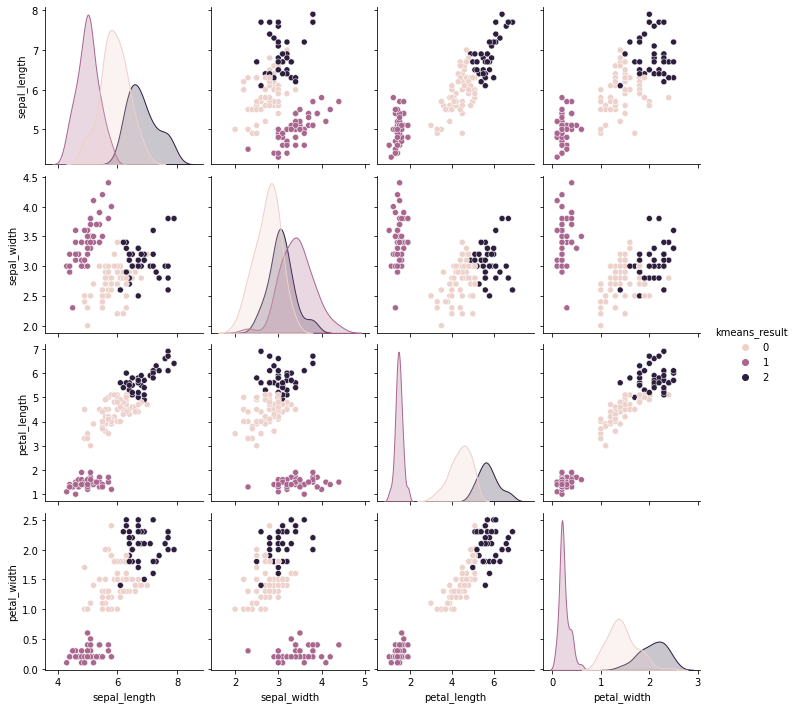

In [140]:
import pandas as pd
result_df = pd.concat([X, pd.DataFrame(labels, columns=["kmeans_result"])], axis=1)
sns.pairplot(result_df, hue="kmeans_result")

Text(0, 0.5, 'loss')

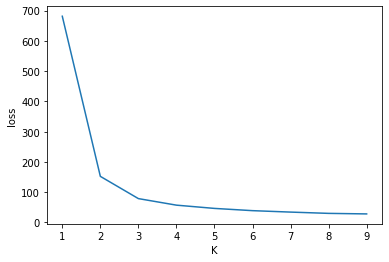

In [142]:
import matplotlib.pyplot as plt
losses = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    losses.append(-kmeans.score(X))
plt.plot(range(1, 10), losses)
plt.xlabel("K")
plt.ylabel("loss")

##27 階層クラスタリング

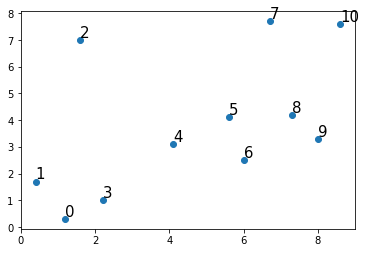

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# 擬似データ
x1 = np.array([1.2, 0.4, 1.6, 2.2, 4.1, 5.6, 6, 6.7, 7.3, 8, 8.6])
x2 = np.array([0.3, 1.7, 7, 1, 3.1, 4.1, 2.5, 7.7, 4.2, 3.3, 7.6])
# わかりやすいように各データに数字を振る
index = np.arange(len(x1))
X = np.array(list(zip(x1, x2)))
# 可視化
plt.plot(X[:,0], X[:,1], "o")
for i in np.arange(len(x1)):
    plt.annotate(f"{i}", (x1[i], x2[i]+0.1), size=15)

In [4]:
Z = linkage(X, "ward")
Z

array([[ 8.        ,  9.        ,  1.14017543,  2.        ],
       [ 0.        ,  3.        ,  1.22065556,  2.        ],
       [ 5.        ,  6.        ,  1.64924225,  2.        ],
       [ 7.        , 10.        ,  1.90262976,  2.        ],
       [ 1.        , 12.        ,  1.92959409,  3.        ],
       [ 4.        , 13.        ,  1.97652894,  3.        ],
       [11.        , 16.        ,  3.82848969,  5.        ],
       [ 2.        , 14.        ,  7.02614166,  3.        ],
       [17.        , 18.        ,  7.81052708,  8.        ],
       [15.        , 19.        , 12.84143979, 11.        ]])

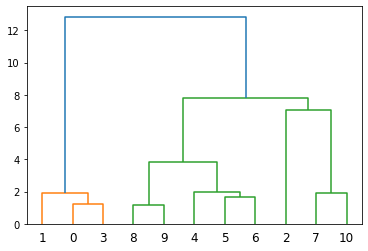

In [5]:
d = dendrogram(Z)

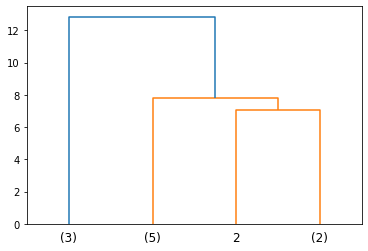

In [6]:
d = dendrogram(Z, truncate_mode="lastp", p=4)

In [7]:
#ラベル取得
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, t=4, criterion="maxclust")
clusters

array([1, 1, 4, 1, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

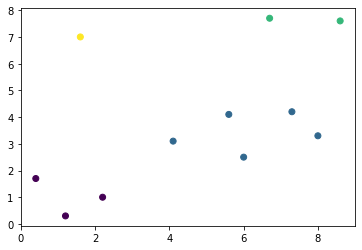

In [8]:
from matplotlib import pyplot as plt 
%matplotlib inline
plt.scatter(X[:,0], X[:,1], c=clusters)

##28 決定木/回帰
理論上，決定木では質的変数はそのまま扱える

特徴量間でスケールを合わせる必要がない

In [10]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

df = sns.load_dataset("diamonds")
df = pd.get_dummies(df, drop_first=True)
X = df.loc[:, df.columns!="price"]
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [12]:
from sklearn.metrics import mean_squared_error
#test
y_pred = model.predict(X_test)
#evaluate
mean_squared_error(y_test, y_pred)

1649883.2975869584

分岐には条件と領域内のsquared errorの平均，sample数と予測値のvalue(領域内の学習データの目的変数の平均値)

上に来ている特徴量は，目的変数を予測するのにより重要である特徴量

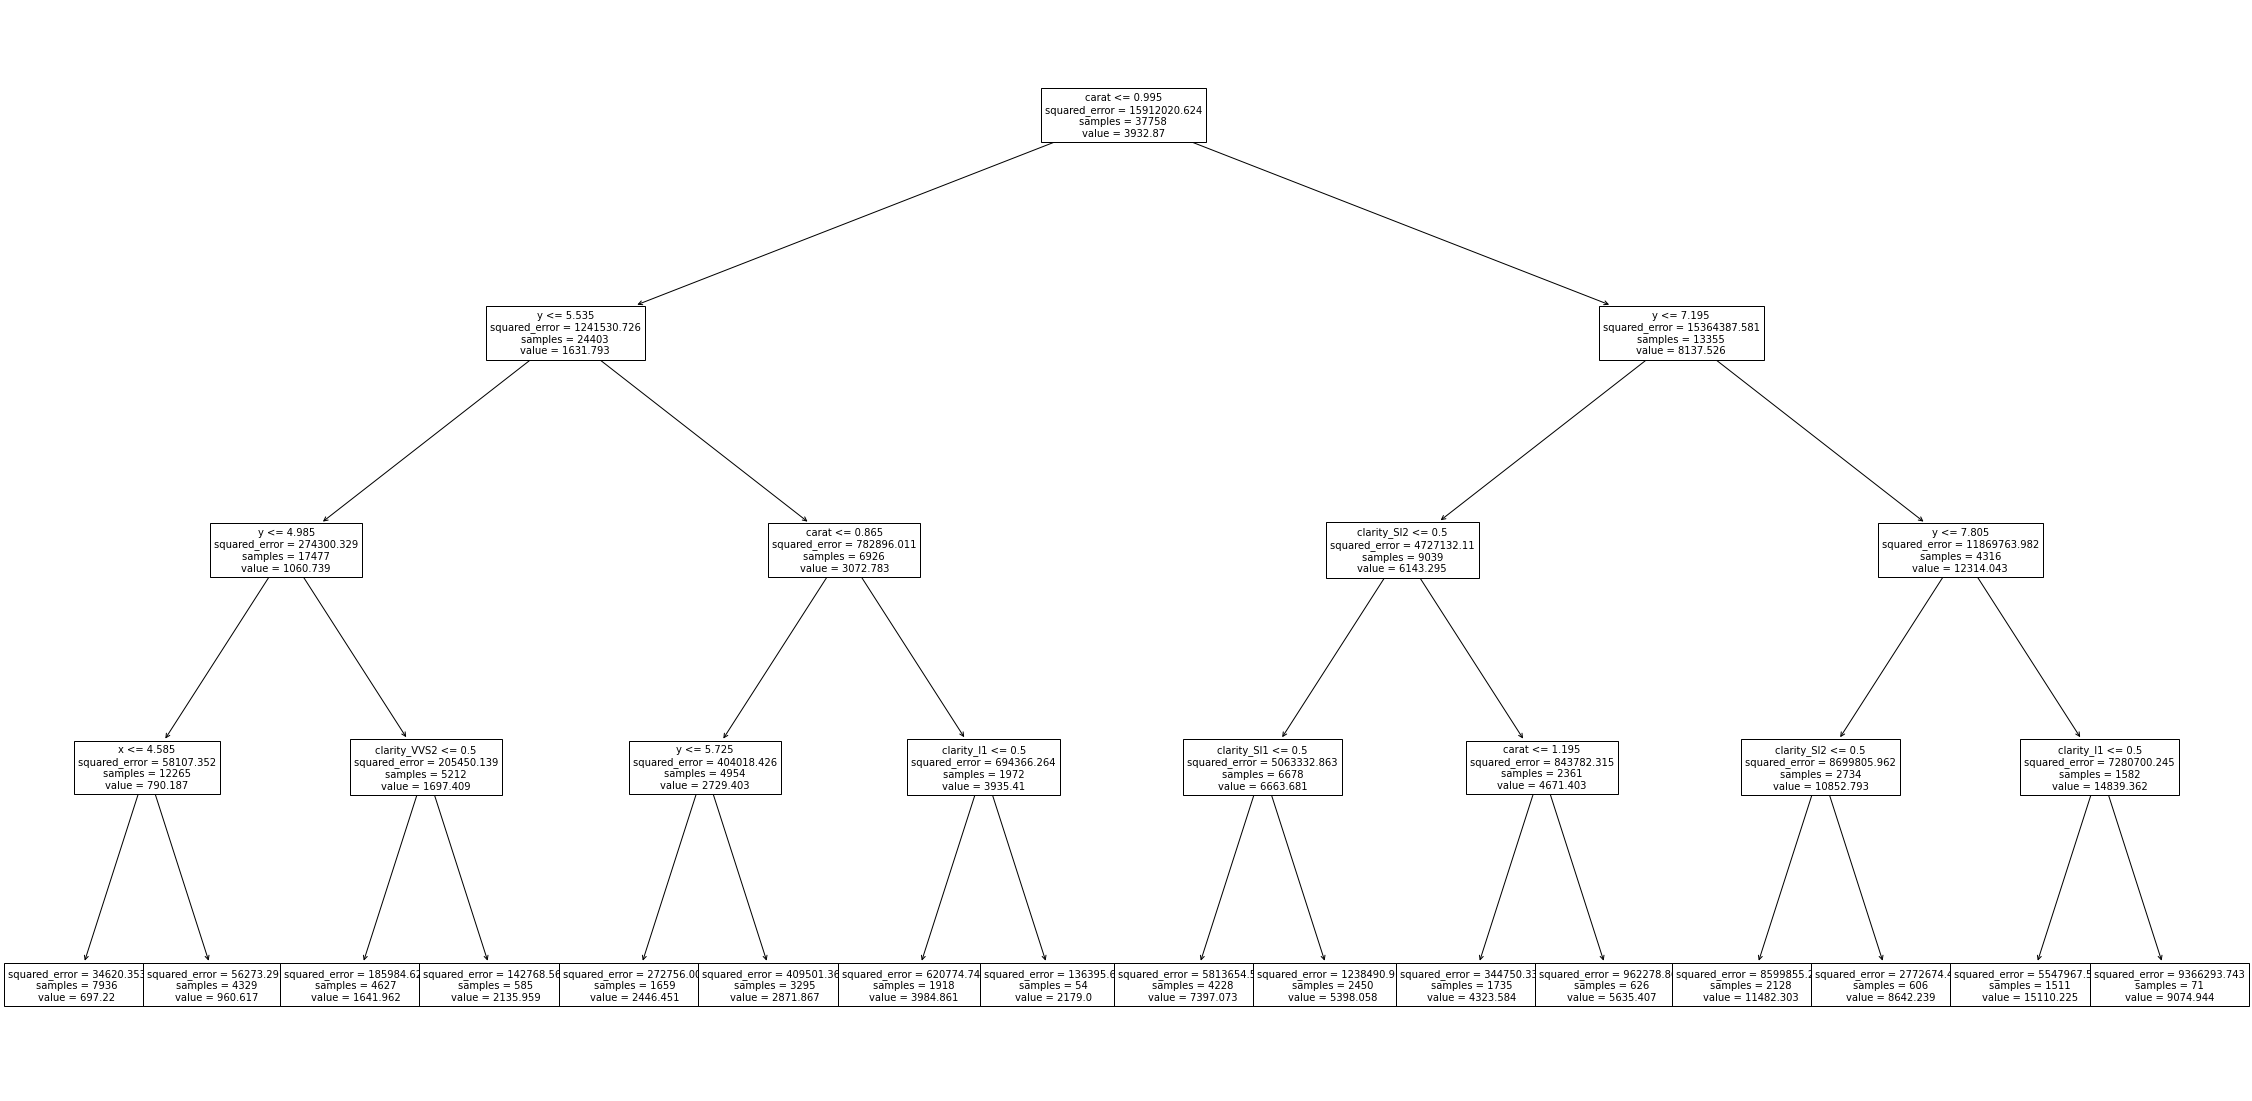

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 20))
_ = tree.plot_tree(model, fontsize=10, feature_names=X.columns)

In [17]:
print(tree.export_text(model, feature_names=list(X.columns)))

|--- carat <= 1.00
|   |--- y <= 5.54
|   |   |--- y <= 4.98
|   |   |   |--- x <= 4.59
|   |   |   |   |--- value: [697.22]
|   |   |   |--- x >  4.59
|   |   |   |   |--- value: [960.62]
|   |   |--- y >  4.98
|   |   |   |--- clarity_VVS2 <= 0.50
|   |   |   |   |--- value: [1641.96]
|   |   |   |--- clarity_VVS2 >  0.50
|   |   |   |   |--- value: [2135.96]
|   |--- y >  5.54
|   |   |--- carat <= 0.87
|   |   |   |--- y <= 5.72
|   |   |   |   |--- value: [2446.45]
|   |   |   |--- y >  5.72
|   |   |   |   |--- value: [2871.87]
|   |   |--- carat >  0.87
|   |   |   |--- clarity_I1 <= 0.50
|   |   |   |   |--- value: [3984.86]
|   |   |   |--- clarity_I1 >  0.50
|   |   |   |   |--- value: [2179.00]
|--- carat >  1.00
|   |--- y <= 7.19
|   |   |--- clarity_SI2 <= 0.50
|   |   |   |--- clarity_SI1 <= 0.50
|   |   |   |   |--- value: [7397.07]
|   |   |   |--- clarity_SI1 >  0.50
|   |   |   |   |--- value: [5398.06]
|   |   |--- clarity_SI2 >  0.50
|   |   |   |--- carat <= 1.20


## 29 決定木/ジニ不純度と木の剪定
分類では，ジニ不純度が小さくなるように領域を分割していく

cost complexity pruningは，木の大きさをペナルティ項としてコスト(不純度)に入れることで木を小さくするアルゴリズム

In [18]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
 
df = sns.load_dataset('titanic')
df = df.dropna()
X = df.loc[:, (df.columns!='survived') & (df.columns!='alive')]
X = pd.get_dummies(X, drop_first=True)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=0)
path = model.cost_complexity_pruning_path(X_train, y_train)
eff_alphas, impurities = path.ccp_alphas, path.impurities

In [21]:
eff_alphas

array([0.        , 0.00656168, 0.00656168, 0.00699913, 0.00726832,
       0.0077282 , 0.00787402, 0.01049869, 0.0111986 , 0.0118874 ,
       0.01526093, 0.01880243, 0.02677358, 0.12717222])

In [22]:
impurities

array([0.        , 0.01312336, 0.02624672, 0.04024497, 0.05478161,
       0.07023802, 0.07811203, 0.09910941, 0.11030801, 0.14597022,
       0.2375358 , 0.2939431 , 0.32071667, 0.4478889 ])

In [24]:
models = []
for eff_alpha in eff_alphas:
    model = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=eff_alpha)
    model.fit(X_train, y_train)
    models.append(model)

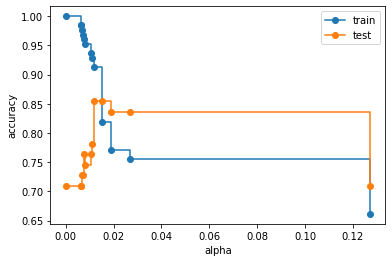

In [26]:
import matplotlib.pyplot as plt
train_scores = [model.score(X_train, y_train) for model in models]
test_scores = [model.score(X_test, y_test) for model in models]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(eff_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(eff_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

alphaが小さいうち(つまりpruningなし)は木が複雑であるが故に過学習している

木をpruningしていくと，汎化性能が高くなっている

##30 アンサンブル学習
複数の互いに相関の弱い弱学習器を組み合わせて高い精度のモデルを構築するアルゴリズム

### バギング
* ブートストラップ法を使って抽出した複数のデータ群に対してそれぞれモデルを学習し組み合わせる手法
* ブートストラップ(bootstrap)
    * 母集団からのサンプリング(標本抽出)手法の一種で，重複を許してランダムにデータを取ってきて標本にするやり方
    * バギングはvarianceを下げる効果がある

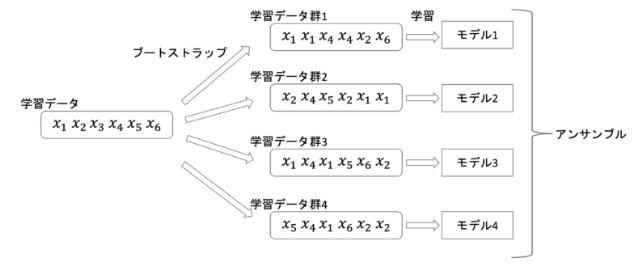

### ブースティング
* モデルが予測を誤ったデータに重みづけをし繰り返し学習して最終的に複数のモデルに重みを付けて予測する手法
* 一般的にvarianceとbiasの両方を下げることができる

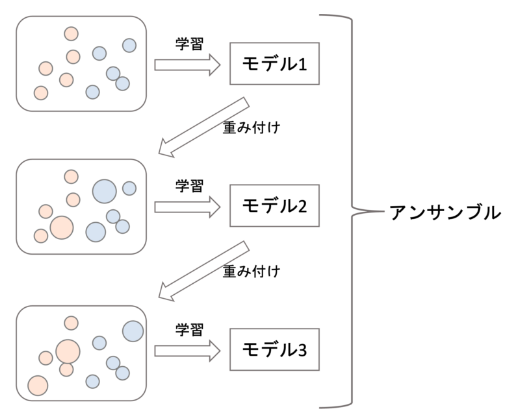

### スタッキング
 * 複数のモデルの予測値を新たな特徴量として別のモデルを学習させ予測する手法

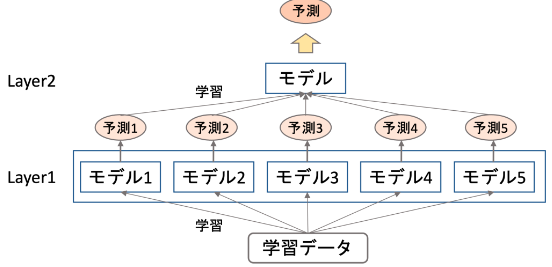

##31 ランダムフォレスト

In [32]:
import pandas as pd
import seaborn as sns
# データロード
df = sns.load_dataset('titanic')
# 欠損値drop
df = df.dropna()
# 特徴量
X = df.loc[:, (df.columns!='survived') & (df.columns!='alive')]
# 質的変数をダミー変数化
X = pd.get_dummies(X, drop_first=True)
# 目的変数
y = df['survived']

sklearn.ensemble.RandomForestClassifier クラス

* n_estimators : アンサンブルする決定木の数

* max_depth : 決定木の深さ

* min_samples_split : floatを指定すると分割する際に必要な全データ数の割合

* max_features : 決定木に使う特徴量の数

* ccp_alpha : cost complexity pruningのalpha

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
rf_model = RandomForestClassifier(random_state=0, ccp_alpha=0.02)
dt_model = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.02)

sklearn.model_selection.RepeatedStratifiedKFold クラス
* 学習データとテストデータを分ける際に，クラスの割合が元のデータセットと同じになるように分けることができるcv

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
rf_scores = cross_val_score(rf_model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)
dt_scores = cross_val_score(dt_model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)

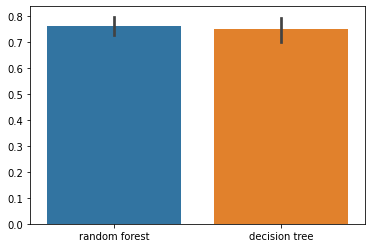

In [35]:
score_df = pd.DataFrame({'random forest': rf_scores, 'decision tree': dt_scores})
sns.barplot(data=score_df)

In [36]:
from scipy import stats
stats.ttest_rel(score_df['random forest'], score_df['decision tree'])

Ttest_relResult(statistic=0.9517151387117377, pvalue=0.35738431321019015)

p値>0.05なので，今回はランダムフォレストと決定木の精度で有意差なし

<BarContainer object of 22 artists>

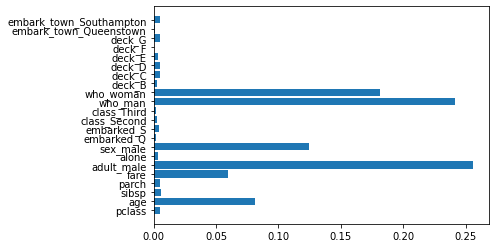

In [37]:
rf_model.fit(X, y)
plt.barh(X.columns, rf_model.feature_importances_)

各特徴量の重要度を確認できる

##32 XGBoost
決定木の勾配ブースティングアルゴリズム

In [1]:
import pandas as pd
import seaborn as sns
 
df = sns.load_dataset('titanic')
# df = df.dropna()
X = df.loc[:, (df.columns!='survived') & (df.columns!='alive')]
X = pd.get_dummies(X, drop_first=True)
y = df['survived']

XGBoostは欠損値を対処するアルゴリズムが組み込まれているので，

欠損値があるデータをそのままモデルに学習させることができる

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

XGBClassifier() のインスタンス生成時のパラメータ

* n_estimators : ブースティングの回数(=学習する決定木の数)
* learning_rate : shrinkageの𝜂
* max_depth : 決定木の最高の深さ
* eval_metric : ブースティング時の各イテレーション時に使う評価指標
* early_stopping_rounds : early stoppingする際の，最低限ブースティングのイテレーションをする回数



In [3]:
from xgboost import XGBClassifier
model = XGBClassifier(early_stopping_rounds=10)

In [6]:
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.182836
[1]	validation_0-error:0.182836
[2]	validation_0-error:0.182836
[3]	validation_0-error:0.182836
[4]	validation_0-error:0.182836
[5]	validation_0-error:0.182836
[6]	validation_0-error:0.182836
[7]	validation_0-error:0.182836
[8]	validation_0-error:0.171642
[9]	validation_0-error:0.171642
[10]	validation_0-error:0.171642
[11]	validation_0-error:0.156716
[12]	validation_0-error:0.156716
[13]	validation_0-error:0.156716
[14]	validation_0-error:0.156716
[15]	validation_0-error:0.156716
[16]	validation_0-error:0.156716
[17]	validation_0-error:0.156716
[18]	validation_0-error:0.152985
[19]	validation_0-error:0.152985
[20]	validation_0-error:0.152985
[21]	validation_0-error:0.152985
[22]	validation_0-error:0.152985
[23]	validation_0-error:0.152985
[24]	validation_0-error:0.152985
[25]	validation_0-error:0.145522
[26]	validation_0-error:0.145522
[27]	validation_0-error:0.156716
[28]	validation_0-error:0.152985
[29]	validation_0-error:0.152985
[30]	validation_0-er

XGBClassifier(early_stopping_rounds=10)

In [7]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

0.3801293060315578

<BarContainer object of 22 artists>

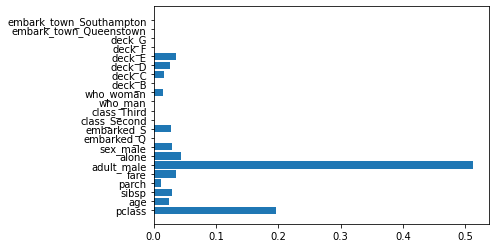

In [8]:
import matplotlib.pyplot as plt
model.feature_importances_
plt.barh(X.columns, model.feature_importances_)

In [25]:
from sklearn.metrics import accuracy_score
y_pred2 = model.predict(X_test)
accuracy_score(y_test, y_pred2)

0.8507462686567164

##33 LightGBM
XGBoostよりも高速で高精度なアルゴリズム

In [31]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import pandas as pd
import seaborn as sns
 
df = sns.load_dataset('titanic')
# df = df.dropna()
X = df.loc[:, (df.columns!='survived') & (df.columns!='alive')]
X = pd.get_dummies(X, drop_first=True)
y = df['survived']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
import lightgbm as lgb
model = lgb.LGBMClassifier(boosting_type="goss", max_depth=5, random_state=0)

In [35]:
eval_set = [(X_test, y_test)]
callbacks = []
callbacks.append(lgb.early_stopping(stopping_rounds=10))
# callbacks.append(lgb.log_evaluation())
model.fit(X_train, y_train, eval_set=eval_set, callbacks=callbacks)

[1]	valid_0's binary_logloss: 0.621028
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.585161
[3]	valid_0's binary_logloss: 0.555772
[4]	valid_0's binary_logloss: 0.531737
[5]	valid_0's binary_logloss: 0.511881
[6]	valid_0's binary_logloss: 0.495915
[7]	valid_0's binary_logloss: 0.481672
[8]	valid_0's binary_logloss: 0.470676
[9]	valid_0's binary_logloss: 0.461572
[10]	valid_0's binary_logloss: 0.453816
[11]	valid_0's binary_logloss: 0.450689
[12]	valid_0's binary_logloss: 0.445853
[13]	valid_0's binary_logloss: 0.44264
[14]	valid_0's binary_logloss: 0.440632
[15]	valid_0's binary_logloss: 0.438769
[16]	valid_0's binary_logloss: 0.43663
[17]	valid_0's binary_logloss: 0.434195
[18]	valid_0's binary_logloss: 0.432441
[19]	valid_0's binary_logloss: 0.431844
[20]	valid_0's binary_logloss: 0.431037
[21]	valid_0's binary_logloss: 0.431955
[22]	valid_0's binary_logloss: 0.431727
[23]	valid_0's binary_logloss: 0.431193
[24]	valid_0's binary_logloss

LGBMClassifier(boosting_type='goss', max_depth=5, random_state=0)

In [36]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

0.42869173970581803

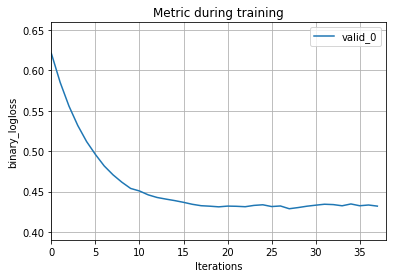

In [38]:
lgb.plot_metric(model)

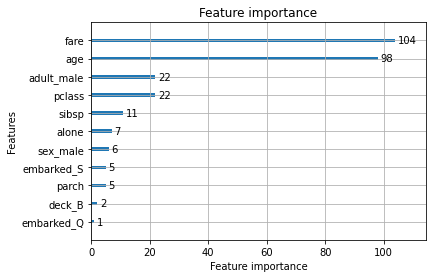

In [39]:
lgb.plot_importance(model)

##34 SVM

In [40]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

SVMは事前に標準化が推奨

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

In [45]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train_pca, y_train)

SVC()

In [46]:
from sklearn.metrics import accuracy_score
# テストデータに対してもPCA変換を実施
X_test_pca = pca.transform(X_test)
y_pred = model.predict(X_test_pca)
accuracy_score(y_test, y_pred)

0.9333333333333333

In [47]:
model.support_vectors_

array([[-2.67914189, -0.73817105],
       [-2.1193603 ,  2.80857322],
       [-2.01808086, -2.16076222],
       [-1.83691058,  0.22264198],
       [-2.01267716, -0.47278431],
       [-0.33739989, -2.59040494],
       [ 0.68991796,  0.71639709],
       [ 1.01841242,  0.75406273],
       [ 0.39405927,  0.81958953],
       [ 0.12134175, -1.31561396],
       [ 0.52655491, -0.01208491],
       [ 1.14259734,  0.50582016],
       [-0.59799672, -1.47307272],
       [ 1.00108719, -1.69126085],
       [ 0.21435381, -1.74582022],
       [ 0.26773026, -0.59585096],
       [ 0.76807504,  0.17465618],
       [ 0.58546256, -0.11934379],
       [-0.65005847, -1.76724016],
       [ 0.78292811,  0.42709078],
       [ 1.05347893, -1.00878745],
       [ 1.24654811,  0.22456375],
       [ 0.8060938 , -0.04480644],
       [ 0.67115053,  0.36047773],
       [ 0.83577732, -1.44733591],
       [ 1.36078095,  0.15396725],
       [ 1.0415574 , -1.76613312],
       [ 1.18175475, -0.56575389],
       [ 0.9792362 ,

In [52]:
len(model.support_vectors_)

43

##35 Pipeline+Grid Search

In [1]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("titanic")
df = df.dropna()
X = df.loc[:, (df.columns!="survived") & (df.columns!="alive")]
X = pd.get_dummies(X, drop_first=True)
y = df["survived"]

In [3]:
from sklearn.svm import SVC
model = SVC(random_state=0)

In [4]:
param_grid = {
    "kernel": ["linear", "rbf"],
    "C": [2**i for i in range(-2, 3)],
}

RepeatedStratifiedKFold クラス

* 指定したk-Foldをさらに複数回実行(Repeated)
* クラスの偏りが無いようにもとのクラスの割合をキープしてデータを分割(Stratified).



In [5]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

### Grid Search

GridSearchCVは標準化などの前処理を組み込むことができない

In [6]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=cv)
grid_search.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=0),
             estimator=SVC(random_state=0),
             param_grid={'C': [0.25, 0.5, 1, 2, 4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [7]:
print(grid_search.best_params_, grid_search.best_score_)

{'C': 0.25, 'kernel': 'linear'} 0.7618118118118118


###Pipeline
前処理とモデルを一つのオブジェクトとして扱うことができるもの

Pipelineなしのバージョン

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 学習データとテストデータ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# SVMのインスタンス生成 (predict_probaが使えるようにprobability=Trueを指定)
model = SVC(probability=True, random_state=0)
model.fit(X_train_scaled, y_train)
# テストデータを予測
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict_proba(X_test_scaled)

Pipelineありのバージョン

In [10]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps = [("scaler", StandardScaler()), 
                            ("model", SVC(probability=True, random_state=0))])
pipeline.fit(X_train, y_train)
y_pred_p = pipeline.predict_proba(X_test)

In [11]:
y_pred_p.all() == y_pred.all()

True

In [14]:
import numpy as np
np.allclose(y_pred_p, y_pred)

True

###Pipeline + GridSearchCV

In [16]:
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", SVC(random_state=0))
])

今回はSVMの処理を”model”という名前でPipelineを作っているので，”model__param”の形にしてキーにする

In [17]:
svm_param_grid = {
    "model__kernel": ["linear", "rbf"],
    "model__C": [2**i for i in range(-2, 3)]
}

In [18]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
grid_search = GridSearchCV(estimator=pipeline, param_grid=svm_param_grid, scoring="accuracy", cv=cv)
grid_search.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=0),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(random_state=0))]),
             param_grid={'model__C': [0.25, 0.5, 1, 2, 4],
                         'model__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [19]:
print(grid_search.best_params_, grid_search.best_score_)

{'model__C': 0.5, 'model__kernel': 'rbf'} 0.752729044834308
